In [3]:
import numpy as np
import matplotlib.pyplot as plt
%run lib.ipynb
%matplotlib inline

In [4]:
def fric(v, gamma=0.1, mu=0.2):
    norma = sqrt(v[0]**2+v[1]**2)
    if norma <= 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:
        f_x = mu*norma**(1.5)*np.sign(v[0])
        f_y = mu*norma**(1.5)*np.sign(v[1])
    return array([f_x,f_y])
def ec_mov(r_v, t, k = 1.0, m = 1.0, fric=0.0):
    """
    r_v contiene r, theta, r punto, theta punto
    ecuacion de movimiento con gravedad radial
    """
    x,y   = r_v[0:2]
    dx,dy = r_v[2:4]    
    r  = sqrt(r_v[0]**2+r_v[1]**2)
    if fric == 0.0:
        dvx = -(k/m)*x
        dvy = -(k/m)*y
    else:
        ff = fric([dx, dy])
        dvx = -(k/m)*x -ff[0]
        dvy = -(k/m)*y -ff[1]  
    return array([dx,dy,dvx,dvy])

In [38]:
t = [0,50]
h = 0.1
solutions = {}
for n in xrange(12):
    p = [0,1,np.cos((np.pi*n/6)),np.sin((np.pi*n/6))]
    sol= int_rk4(ec_mov, p, t, h, fric=fric)[1]
    solutions[n] = sol

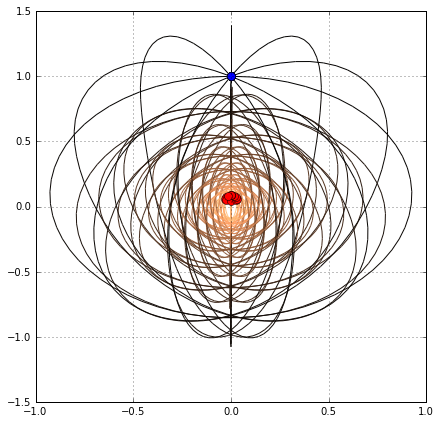

In [26]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.grid(True)

# particula
for sol in solutions.values():
    colorline(sol[:,0], sol[:,1],cmap='copper', linewidth=1);
    ax.plot(sol[ 0,0],sol[ 0,1],'o-',c="b",ms=8,alpha=1.0)
    ax.plot(sol[-1,0],sol[-1,1],'o-',c="r",ms=8,alpha=1.0)


## ( C ) Energia

In [27]:
def energia(r_v, k = 1.0, m = 1.0):
    K = 0.5*m*r_v[2]**2+0.5*m*r_v[3]**2
    R = 0.5*k*r_v[0]**2+0.5*k*r_v[1]**2
    return K+R

In [53]:
N = 100
inicio,mi_dt = [0.0,1.0,1.,1.0],0.1
trayectoria = [inicio]
E0 = energia(inicio)
energias = [E0]

i = 1
while energia(trayectoria[i-1])>=0.001*E0:
    t,sol = int_rk4(ec_mov,trayectoria[i-1],[0,mi_dt],fric=fric)
    y = sol[-1,:]
    trayectoria.append(y)
    energias.append(energia(y))
    i += 1
trayectoria = np.array(trayectoria)    

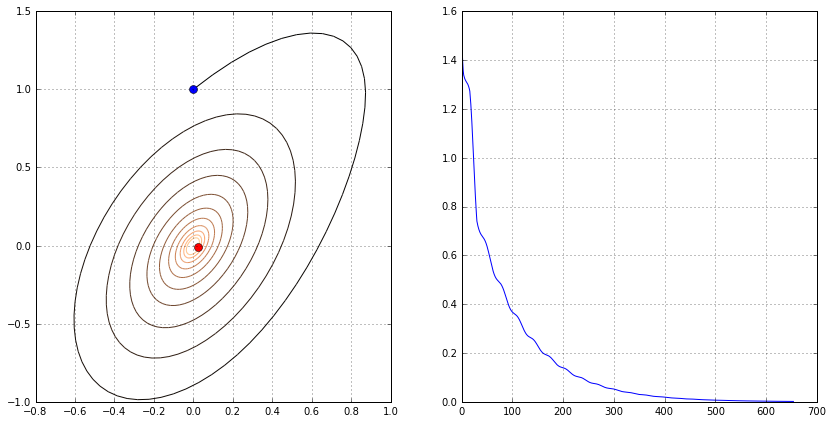

In [56]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(121)
ax.grid(True)

# particula
colorline(trayectoria[:,0], trayectoria[:,1],cmap='copper', linewidth=1);
ax.plot(trayectoria[ 0,0],trayectoria[ 0,1],'o-',c="b",ms=8,alpha=1.0)
ax.plot(trayectoria[-1,0],trayectoria[-1,1],'o-',c="r",ms=8,alpha=1.0)

ax = fig.add_subplot(122)
ax.grid(True)

# particula
ax.plot(range(len(energias)), energias, linewidth=1);

In [ ]:
P_theta = ((theta_dot*rho**2)**2)/m
P_rho = m*rho_dot = Px*x + Py*y/ norm(x,y)